# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

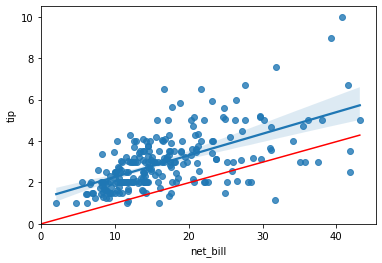

In [3]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .0993*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 45.328500000000005)

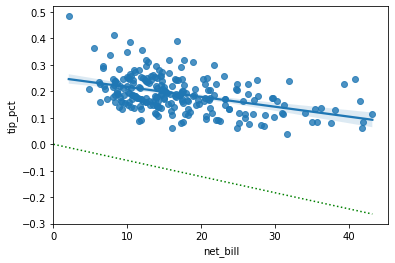

In [4]:
# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y =-0.0061*x

# Plotando a linha dos 10%
plt.plot(x, y, ':g')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

<AxesSubplot:>

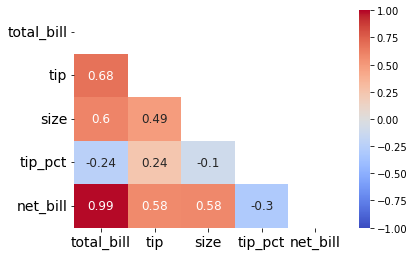

In [5]:
masc = np.zeros_like(tips.corr())
tri_index = np.triu_indices_from(masc)
masc[tri_index] = True
masc
plt.figure(figsize=(6,4))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.heatmap(tips.corr(),annot=True,annot_kws={'size':12},vmin=-1,vmax=1,cmap='coolwarm',mask=masc)

In [6]:
reg1 = smf.ols('tip ~ net_bill', data = tips).fit()
reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
print(reg1.summary())
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           5.02e-23
Time:                        17:18:00   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

### Conclusão

As variáveis ```tip``` e ```tip_pct``` são bem distintas entre si, a começar pela correlação entre estas e a variável resposta  (0.59 e -0.3), respectivamente.

Estas características tão distintas acabam se refletindo no R² de 0.333 para a variável ```tip``` e de 0.091 para a variável ``tip_pct`` - uma variação de 3.65 vezes - o que acaba contribuindo para inviabilizar  qualquer tipo de comparação.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [7]:
#1) obtenha o valor predito pred para tip_pct (dica, veja o atributo reg.fittedvalues)
pred = smf.ols('tip ~ tip_pct', data = tips).fit()
pred.fittedvalues

0      2.714081
1      2.976022
2      2.993701
3      2.917205
4      2.936793
         ...   
239    3.108838
240    2.747272
241    2.782726
242    2.807562
243    2.973710
Length: 244, dtype: float64

In [8]:
#2) obtenha o valor predito para tip como tip_pct * net_bill
tip = smf.ols('tip ~ tip_pct * net_bill', data = tips).fit()
tip.fittedvalues

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Length: 244, dtype: float64

In [9]:
#3) calcule o  𝑅2  do modelo para tip
print(pred.summary())
print(tip.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     15.00
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           0.000139
Time:                        17:18:05   Log-Likelihood:                -417.62
No. Observations:                 244   AIC:                             839.2
Df Residuals:                     242   BIC:                             846.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5848      0.137     18.842      0.0